In [54]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

# metadata
print("METADATA") 
print(chronic_kidney_disease.metadata) 
print("\n\n")  
#variable information 
print("VARIABLES")
print(chronic_kidney_disease.variables)

METADATA
{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\

In [55]:
df = X.join(y)
#print(df.head())
'''The modified data frame should meet the following requirements:

    It should include exactly the following columns:
        age
        blood pressure
        specific gravity
        albumin
        sugar
        blood glucose random
        blood urea
        sodium
        potassium
        hemoglobin
        packed cell volume
        white blood cell count
        red blood cell count
        class
    The class column should be the last column in the data frame.
    The columns should be in the same order as listed above.
    The column names have been given above. Make sure that the column names are exactly the same.
'''
df = df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'class']]
df['hemo'] = df.hemo/10 # converting hemoglobin to g/dL
df['class'] = df['class'].map({'ckd': 'a', 'notckd': 'c'}) # converting class to binary

# Some of the values are missing. Missing values are logged as 'nan'
# Copy the data frame to a new data frame df_cleaned and remove all rows with 3 or more missing values
df_cleaned = df.replace('nan', np.nan)
df_cleaned = df_cleaned.dropna(thresh=len(df.columns) - 2) # Thresh counts non-missing values. (len -2 means 2 missing values are allowed)
print(df_cleaned)


      age     bp     sg   al   su       rbc     bu    sod  pot  hemo   pcv  \
3    48.0   70.0  1.005  4.0  0.0    normal   56.0  111.0  2.5  1.12  32.0   
4    51.0   80.0  1.010  2.0  0.0    normal   26.0    NaN  NaN  1.16  35.0   
5    60.0   90.0  1.015  3.0  0.0       NaN   25.0  142.0  3.2  1.22  39.0   
8    52.0  100.0  1.015  3.0  0.0    normal   60.0    NaN  NaN  1.08  33.0   
9    53.0   90.0  1.020  2.0  0.0  abnormal  107.0  114.0  3.7  0.95  29.0   
..    ...    ...    ...  ...  ...       ...    ...    ...  ...   ...   ...   
395  55.0   80.0  1.020  0.0  0.0    normal   49.0  150.0  4.9  1.57  47.0   
396  42.0   70.0  1.025  0.0  0.0    normal   31.0  141.0  3.5  1.65  54.0   
397  12.0   80.0  1.020  0.0  0.0    normal   26.0  137.0  4.4  1.58  49.0   
398  17.0   60.0  1.025  0.0  0.0    normal   50.0  135.0  4.9  1.42  51.0   
399  58.0   80.0  1.025  0.0  0.0    normal   18.0  141.0  3.5  1.58  53.0   

        wbcc  rbcc class  
3     6700.0   3.9     a  
4     730

In [56]:
df_affected = df_cleaned[df_cleaned['class'] == 'a']
df_control = df_cleaned[df_cleaned['class'] == 'c']

print("AFFECTED:")
print(df_affected.describe())
print("\n")
print("CONTROL:")
print(df_control.describe())

print(df_affected.describe().loc['mean'] - df_control.describe().loc['mean'])   # difference in means

AFFECTED:
              age          bp          sg         al          su          bu  \
count  106.000000  108.000000  108.000000  109.00000  109.000000  108.000000   
mean    56.990566   81.574074    1.013519    2.06422    0.834862   85.513889   
std     15.070308   16.243592    0.004699    1.39626    1.343804   62.995529   
min      6.000000   50.000000    1.005000    0.00000    0.000000    1.500000   
25%     48.250000   70.000000    1.010000    1.00000    0.000000   39.750000   
50%     60.000000   80.000000    1.015000    2.00000    0.000000   66.500000   
75%     65.750000   90.000000    1.015000    3.00000    2.000000  113.500000   
max     90.000000  180.000000    1.025000    5.00000    5.000000  322.000000   

              sod         pot        hemo         pcv          wbcc       rbcc  
count  101.000000  101.000000  109.000000  109.000000    102.000000  97.000000  
mean   134.079208    4.813861    1.043853   31.788991   9671.568627   3.939175  
std      6.983814    4.339

In [59]:
# We combine the two data frames into a single data frame df_combined
# Add two columns 'affected' and 'control' to the data frame.
# The 'affected' column should have a value of 1 for all rows in the affected data frame and 0 for all rows in the control data frame.
# Convert non-numeric columns to numeric or drop them
df_affected = df_affected.apply(pd.to_numeric, errors='coerce')
df_affected['status'] = "affected"
df_control = df_control.apply(pd.to_numeric, errors='coerce')
df_control['status'] = "healthy"


# Combine the dataframes
df_combined = pd.concat([df_affected, df_control])

infected_mask = df_combined['status'] == 'affected'
healthy_mask = df_combined['status'] == 'healthy'

# Calculate the correlation matrices
infected_corr = df_combined[infected_mask].drop(['status'], axis=1).corr()
healthy_corr = df_combined[healthy_mask].drop(['status'], axis=1).corr()



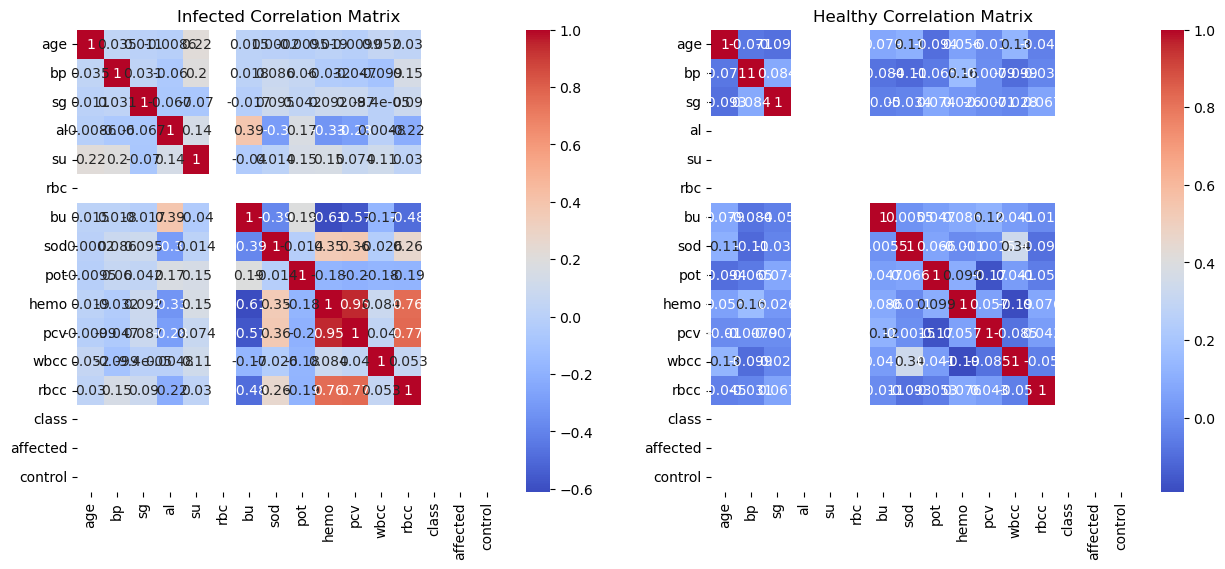

In [60]:
import seaborn as sns
# Plot the correlation matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(infected_corr, ax=axes[0], annot=True, cmap='coolwarm')
axes[0].set_title('Infected Correlation Matrix')

sns.heatmap(healthy_corr, ax=axes[1], annot=True, cmap='coolwarm')
axes[1].set_title('Healthy Correlation Matrix')

plt.show()

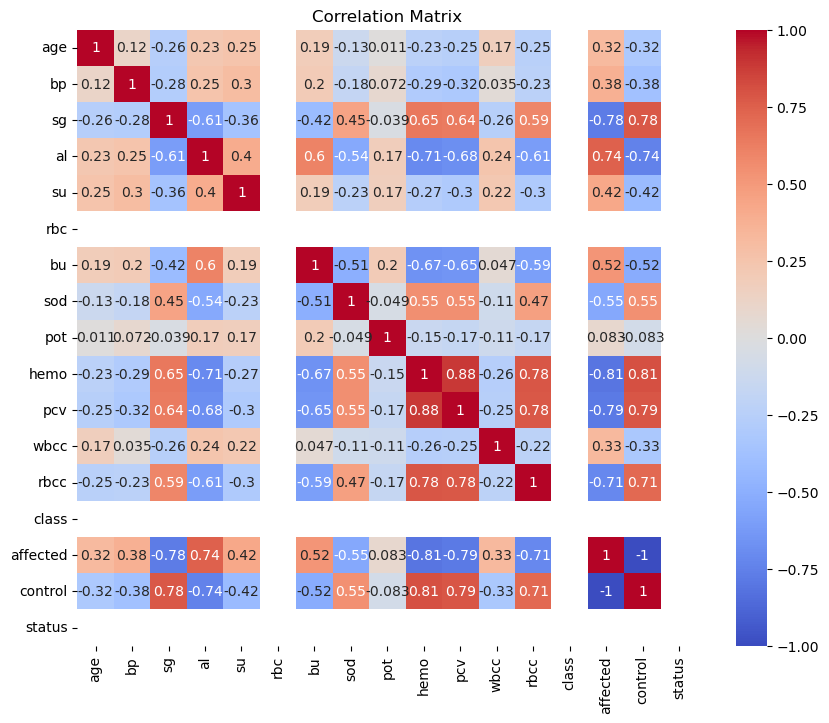

In [61]:
df_combined['status'] = df_combined['status'].apply(lambda x: 1 if x == 'infected' else 0)

# Calculate the correlation matrix
corr_matrix = df_combined.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()